# Line tracing

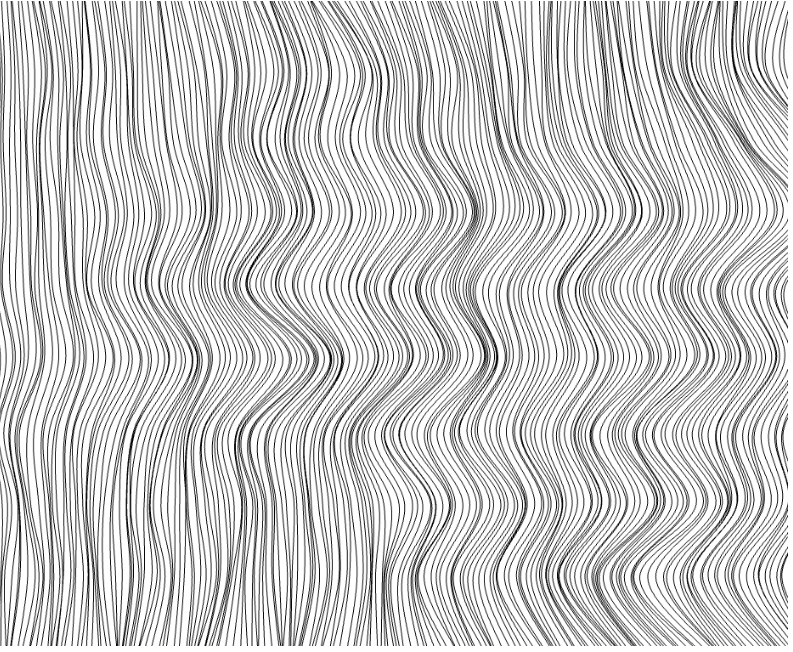

*A result similar to the one we will do today.*

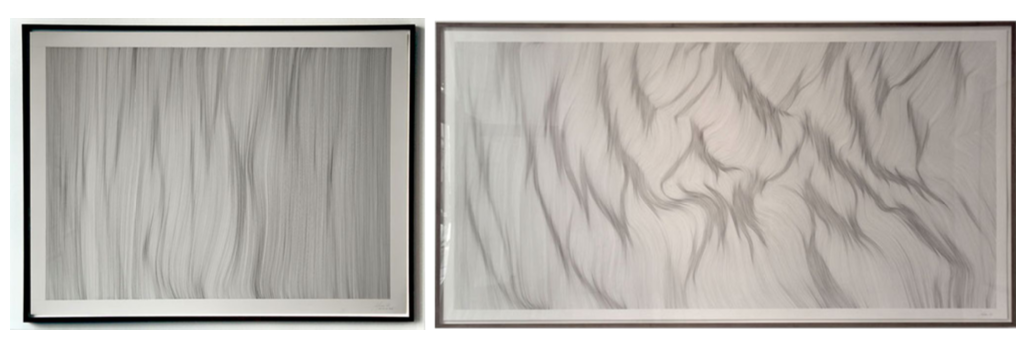

*Example hand made drawings by John Franzen* 

This lab assignment is inspired to the work of [John Franzen](https://www.johnfranzen.com/each-line-one-breath) and to the computer implementation of the procedure made by [Anders Hoff (Incovergent)](https://inconvergent.net/generative/linetrace/). 

We will use the cubic interpolation functionality (with [Catmull Rom splines](https://www.mvps.org/directx/articles/catmull/)) to create a sequence of randomly ondulating "lines". Each line will have a fixed number of vertices that we will predefine with a variable.

The procedure followed by the artist is something like:

- draw a wavy vertical line
- draw a wavy line next to it that adapts to its wavy-ness

## Drawing
Create a sketch with this code 

```python
from py5canvas import *

num_points = 20
spacing = 5

def setup():
    create_canvas(600, 600)

def draw():
    random_seed(10)
    background(0)
    stroke(255)
    no_fill()

run()
```

Now inside `draw` we will create the points along an initial vertical line, which we will then shift randomly to create a series of wavy lines. We want to store the points along the line in the list, so we can keep into account the previous line when drawing a new one.

To do so add this to `draw` (remember the indentation!):

```python
line = []
for y in linspace(0, height, num_points):
    line.append(Vector(-spacing, y))
```
It is a sequence of points along a vertical line (not wavy yet).

Then add the following, which will produce the drawing:

```python
amount = 5 
x = 0
while x < width+spacing: 
    begin_shape()
    for i in range(num_points):
        line[i] += Vector(random(0, 1)*amount + spacing, 0)
        curve_vertex(line[i])
    end_shape()
    x += spacing
```

The code starts a while loop checking if an initial value of `x` is less than the width of the canvas + a margin.

Inside the while loop we begin drawing a shape with `begin_shape()` and in a second `for` giving us an index `i` for each element in the list `lines`. For each index, we shift the vector `line[i]` by adding another vector with a random horizontal offset and add the position to the curve with `curve_vertex`. Once the inner loop is finished, we stop drawing the shape with `end_shape()`.

## Drawing a version with circles
To draw circles we can start from a circle instead of a line, but we also must keep track of the angles
 that give us points along a circle. To do so, replace the `line` initialization code (the loop adding elements to the `line` list) with

```python
angles = linspace(0, PI*2, num_points, False)
line = []
for angle in angles:
    line.append(direction(angle))
```
This creates a sequence of angles around a circle using linspace (excluding the last) 
and then stores the corresponding direction vectors inside the `line` list.

To draw the wavy circles, we will start from an initial radius, 
and follow a similar procedure the previous but going around circles instead of vertical lines

```python
translate(center)
radius = 50
amount = 5 
while radius < width: 
    begin_shape()
    for i in range(num_points):
        line[i] += direction(angles[i])*(random(0, 1)*amount + spacing)
        curve_vertex(line[i])
    end_shape(CLOSE)
    radius += spacing
```
The main difference in this code is that we translate the origin to the center (to simplify circle drawing) and offset each point on the previous circle with a vector:

```python
direction(angles[i])*(random(0, 1)*amount + spacing)
```
The vector is given by the list item `angles[i]` and we scale this vector by a random amount plus the predefined spacing.

This will create an image similar to this one:

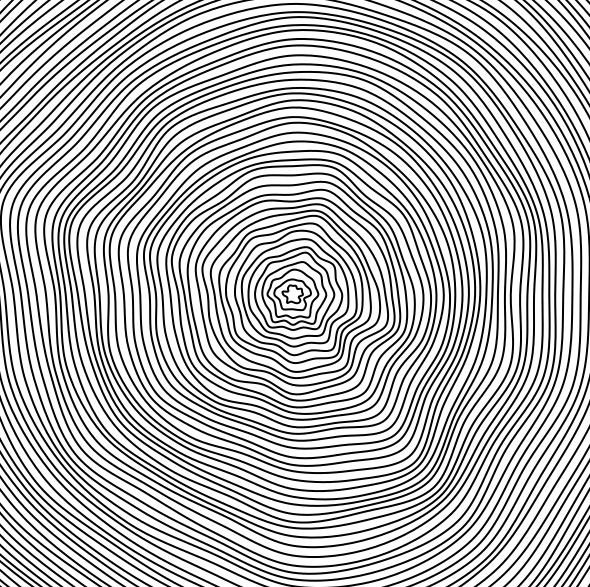


## Extensions:
- Add mouse interaction (e.g. with `remap` to modify the `amount` variable)
- Try deviating from straight vertical lines: make them horizontal, or concentric circles?


